# MNIST Data 분류


In [27]:
# Import Modules
# 1. MNIST Dataset - Mnist데이터를 불러오기 위한 모듈 밑바닥부터 시작하는 딥러닝 제공
# 2. Numpy 
# 3. Layer Module - 구현한 레이어 모듈
# 4. PIL - 이미지 출력을 위한 모듈
# 5. matplotlib - 그래프 출력을 위한 모듈 

from Dataset.mnist import load_mnist
import numpy as np
import MnistLayers as ly
from PIL import Image
import matplotlib.pyplot as plt

#랜덤 시드 고정
np.random.seed(777)

In [28]:
# Model -1
# 2 Linear Layer를 이용하여 분류.
# - Linear(784*50) -> ReLU -> Linear(50*10) 
# forward : 순전파
# backward : 역전파
# step : Weight update
class Model : 
    def __init__(self,inputsize, outputsize, hiddenlayer) :
        self.linear1 = ly.Linear(inputsize,hiddenlayer)
        self.relu = ly.ReLU()
        self.linear2 = ly.Linear(hiddenlayer, outputsize)
        self.parameters = {}
        self.parameters['linear1'] = self.linear1.parameters
        self.parameters['linear2'] = self.linear2.parameters
    
    def forward(self,X) :
        X1 = self.linear1.forward(X)
        X2 = self.relu.forward(X1)
        X3 = self.linear2.forward(X2)
        return X3

    def backward(self,dY) :
        dX2, dW2, db2 = self.linear2.backward(dY)
        dZ = self.relu.backward(dX2)
        dX1, dW1, db1 = self.linear1.backward(dZ)
        return dW1,db1,dW2,db2
    
    def step(self, stepf, *grad) :
        self.parameters['linear1']['W'] = stepf(self.parameters['linear1']['W'],grad[0])
        self.parameters['linear1']['b'] = stepf(self.parameters['linear1']['b'],grad[1])
        self.parameters['linear2']['W'] = stepf(self.parameters['linear2']['W'],grad[2])
        self.parameters['linear2']['b'] = stepf(self.parameters['linear2']['b'],grad[3])


In [29]:
# Model - 2
# 1 Linear layer를 이용한 분류
# Linear(784*10)
# forward : 순전파
# backward : 역전파
# step : Update
class Model_2 :
    def __init__(self,inputsize,outputsize) :
        self.linear1 = ly.Linear(inputsize=inputsize,outputsize=outputsize)
        self.parameters = []
        self.parameters.append(self.linear1.parameters)
    def forward(self,X) :
        X1 = self.linear1.forward(X)
        return X1
    def backward(self,dY) :
        dX,dW,db = self.linear1.backward(dY)
        return dW,db
    def step(self,stepf,*grad) :
        self.parameters[0]['W'] = stepf(self.parameters[0]['W'],grad[0])
        self.parameters[0]['b'] = stepf(self.parameters[0]['b'],grad[1])

In [30]:
# Optimize function - SGD
# w - lr*dw
# lr : 학습률 
class SGD : 
    def __init__(self, model, lr) :
        self.model = model
        self.lr = lr
    def step(self,*grad):
        stepf = lambda x,y : x - self.lr*y
        self.model.step(stepf,*grad)
        
# momentum 적용
# w - v
# v = mu*v + lr*dw
class momentum : 
    def __init__(self, model, lr, mu) :
        self.model = model
        self.lr = lr
        self.mu = mu
        self.v = 0
    def step(self,*grad):
        for i in range(len(grad)) :
            self.v = self.mu*self.v + self.lr*grad[i]
        stepf = lambda x,y : x - self.lr*y
        self.model.step(stepf,*grad)

In [31]:
# Utility

# 정확도
# Perdict , Target (batchsize, outputsize)
def Accuracy(predict,target) :
    predict = np.argmax(predict,axis=1)
    target = np.argmax(target,axis=1)
    true = 0
    for i in range(len(predict)) :
        if predict[i] == target[i] :
            true += 1
    print("true : ", true)
    return true/len(predict)*100

# 이미지 출력
# img : numpy 배열 
def img_show(img) :
    img = img.reshape(28,28)
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# 두개의 그래프 출력
# X : Green Graph
# Y : Blue Graph
def drowgraph(X,Y) :
    plt.plot(X,color='green')
    plt.plot(Y)
    plt.show()


In [32]:
# Data Load
(train_feature, train_target),(test_feature,test_target) = load_mnist(flatten=True, normalize = True, one_hot_label=True)
# Train/Validation Set 나누기
trainrate = int(train_feature.shape[0]*0.9)
x_train, x_validation = train_feature[:trainrate,:], train_feature[trainrate:,:]
y_train, y_validation = train_target[:trainrate,:], train_target[trainrate:,:]

In [33]:
# 데이터 형상 확인
print("Train Feature shape : ",train_feature.shape)
print("Train Target shape : ",train_target.shape)
img_show(x_train[0])

Train Feature shape :  (60000, 784)
Train Target shape :  (60000, 10)


In [34]:
# hyper parmeter 설정
batchsize = 500
epochs = 100

##### 2-layer

In [46]:
lr = 1e-5

# Model 및 Loss Function, Optimizer 선언
model = Model(inputsize = x_train.shape[1], hiddenlayer=50, outputsize=y_train.shape[1])
LossFunction = ly.SoftMaxWithCrossEntropy()
optim = SGD(model,lr=lr)

0======================================
true :  53
Accuracy :  10.6
loss :  2.3026582058205975
10======================================
true :  49
Accuracy :  9.8
loss :  2.3024355025236427
20======================================
true :  49
Accuracy :  9.8
loss :  2.3025593358084584
30======================================
true :  49
Accuracy :  9.8
loss :  2.3027048852989687
40======================================
true :  49
Accuracy :  9.8
loss :  2.302812141864587
50======================================
true :  49
Accuracy :  9.8
loss :  2.3028772603849377
60======================================
true :  49
Accuracy :  9.8
loss :  2.3029153437220207
70======================================
true :  49
Accuracy :  9.8
loss :  2.302937015391122
80======================================
true :  49
Accuracy :  9.8
loss :  2.302949171770627
90======================================
true :  49
Accuracy :  9.8
loss :  2.3029559581197807


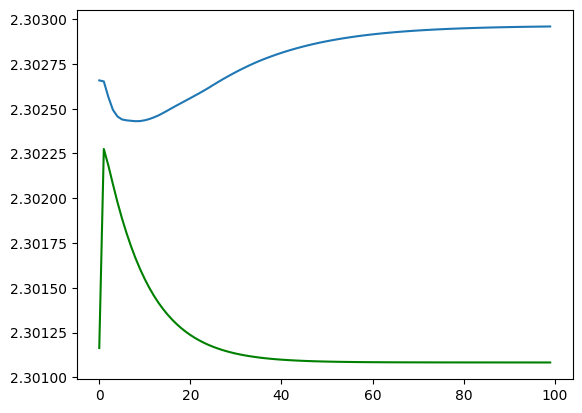

true :  1135
11.35


In [47]:
loss = 0
lossval = []
losstrain = []
for epoch in range(epochs) :
    for i in range(0,x_train.shape[0],batchsize) :
        x_batch = x_train[i:i+batchsize,:]
        y_batch = y_train[i:i+batchsize,:]
        
        predict = model.forward(x_batch)
        loss += LossFunction.forward(predict,y_batch)
        
        dY = LossFunction.backward()
        dW1,db1,dW2,db2 = model.backward(dY)
        optim.step(dW1,db1,dW2,db2)
    losstrain.append(loss/int(x_train.shape[0]/batchsize))
    loss = 0
    x = x_validation[:batchsize,:]
    y = y_validation[:batchsize,:]

    predict = model.forward(x)
    lossval.append(LossFunction.forward(predict,y))

    if(epoch%10 == 0) : 
        print(f"{epoch}======================================")
        print("Accuracy : ",Accuracy(predict,y))
        print("loss : ", lossval[len(lossval)-1] )
drowgraph(losstrain,lossval)

test_predict = model.forward(test_feature)
print(Accuracy(test_predict,test_target))

##### 1-layer (SGD)

In [37]:
lr  = 1e-5
# Model 및 Loss Function, Optimizer 선언
model = Model_2(inputsize=x_train.shape[1],outputsize=y_train.shape[1])
LossFunction = ly.SoftMaxWithCrossEntropy()
optim = SGD(model,lr=lr)

0======================================
true :  317
Accuracy :  63.4
loss :  1.8165540989253632
10======================================
true :  425
Accuracy :  85.0
loss :  0.7318008872526184
20======================================
true :  437
Accuracy :  87.4
loss :  0.5633709817175057
30======================================
true :  440
Accuracy :  88.0
loss :  0.4920693636508196
40======================================
true :  445
Accuracy :  89.0
loss :  0.45133333826854194
50======================================
true :  446
Accuracy :  89.2
loss :  0.42440955586191986
60======================================
true :  446
Accuracy :  89.2
loss :  0.4050083866462483
70======================================
true :  446
Accuracy :  89.2
loss :  0.39020752228608535
80======================================
true :  447
Accuracy :  89.4
loss :  0.3784517997052689
90======================================
true :  448
Accuracy :  89.60000000000001
loss :  0.3688312934308518


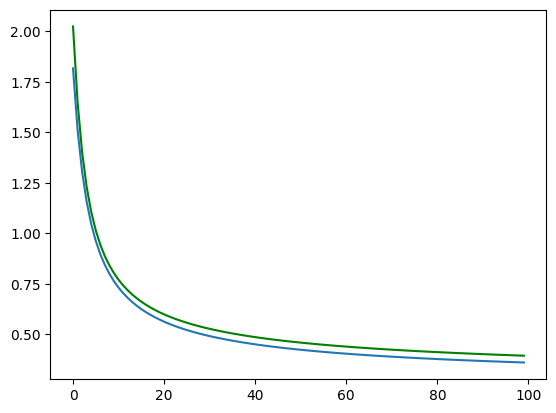

true :  9043
90.42999999999999


In [38]:
loss = 0
lossval = []
losstrain = []
for epoch in range(epochs) :
    for i in range(0,x_train.shape[0],batchsize) :
        x_batch = x_train[i:i+batchsize,:]
        y_batch = y_train[i:i+batchsize,:]
        
        predict = model.forward(x_batch)
        loss += LossFunction.forward(predict,y_batch)
        
        dY = LossFunction.backward()
        dW1,db1 = model.backward(dY)
        optim.step(dW1,db1)
    losstrain.append(loss/int(x_train.shape[0]/batchsize))
    loss = 0
    x = x_validation[:batchsize,:]
    y = y_validation[:batchsize,:]

    predict = model.forward(x)
    lossval.append(LossFunction.forward(predict,y))

    if(epoch%10 == 0) : 
        print(f"{epoch}======================================")
        print("Accuracy : ",Accuracy(predict,y))
        print("loss : ", lossval[len(lossval)-1] )
drowgraph(losstrain,lossval)

test_predict = model.forward(test_feature)
print(Accuracy(test_predict,test_target))

##### 1-layer(SGD + 1e-3)

In [39]:
lr  = 1e-3

model = Model_2(inputsize=x_train.shape[1],outputsize=y_train.shape[1])
LossFunction = ly.SoftMaxWithCrossEntropy()
optim = SGD(model,lr=lr)

0======================================
true :  449
Accuracy :  89.8
loss :  0.3595572490495338
10======================================
true :  465
Accuracy :  93.0
loss :  0.263378854254835
20======================================
true :  464
Accuracy :  92.80000000000001
loss :  0.25448436812083197
30======================================
true :  462
Accuracy :  92.4
loss :  0.2512827444011356
40======================================
true :  466
Accuracy :  93.2
loss :  0.24986027347795522
50======================================
true :  466
Accuracy :  93.2
loss :  0.24923231934109583
60======================================
true :  465
Accuracy :  93.0
loss :  0.24902793643470456
70======================================
true :  465
Accuracy :  93.0
loss :  0.24907157707556138
80======================================
true :  466
Accuracy :  93.2
loss :  0.24926774033097251
90======================================
true :  466
Accuracy :  93.2
loss :  0.24955970402948024


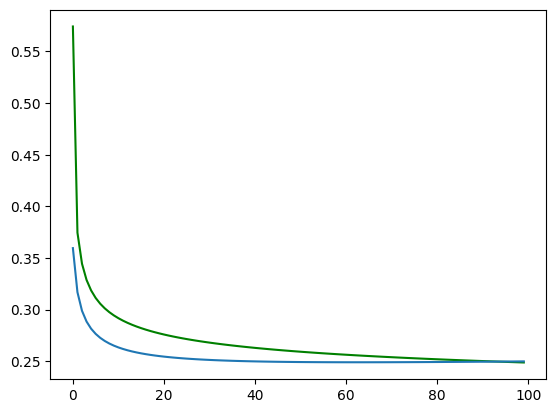

true :  9255
92.55


In [40]:
loss = 0
lossval = []
losstrain = []
for epoch in range(epochs) :
    for i in range(0,x_train.shape[0],batchsize) :
        x_batch = x_train[i:i+batchsize,:]
        y_batch = y_train[i:i+batchsize,:]
        
        predict = model.forward(x_batch)
        loss += LossFunction.forward(predict,y_batch)
        
        dY = LossFunction.backward()
        dW1,db1 = model.backward(dY)
        optim.step(dW1,db1)
    losstrain.append(loss/int(x_train.shape[0]/batchsize))
    loss = 0
    x = x_validation[:batchsize,:]
    y = y_validation[:batchsize,:]

    predict = model.forward(x)
    lossval.append(LossFunction.forward(predict,y))

    if(epoch%10 == 0) : 
        print(f"{epoch}======================================")
        print("Accuracy : ",Accuracy(predict,y))
        print("loss : ", lossval[len(lossval)-1] )
drowgraph(losstrain,lossval)

test_predict = model.forward(test_feature)
print(Accuracy(test_predict,test_target))

##### 1-layer (momentum + 1e-5)

In [41]:
lr  = 1e-5
mu = 0.9
model = Model_2(inputsize=x_train.shape[1],outputsize=y_train.shape[1])
LossFunction = ly.SoftMaxWithCrossEntropy()
optim = momentum(model,lr=lr,mu=mu)

0======================================
true :  292
Accuracy :  58.4
loss :  1.8900535045890434
10======================================
true :  428
Accuracy :  85.6
loss :  0.7336719848316862
20======================================
true :  435
Accuracy :  87.0
loss :  0.5644434061014556
30======================================
true :  439
Accuracy :  87.8
loss :  0.49277712538412866
40======================================
true :  445
Accuracy :  89.0
loss :  0.45169195737074086
50======================================
true :  445
Accuracy :  89.0
loss :  0.4244636010255917
60======================================
true :  447
Accuracy :  89.4
loss :  0.40480826678005327
70======================================
true :  448
Accuracy :  89.60000000000001
loss :  0.3897975929420107
80======================================
true :  448
Accuracy :  89.60000000000001
loss :  0.377868067458694
90======================================
true :  447
Accuracy :  89.4
loss :  0.368102221368905


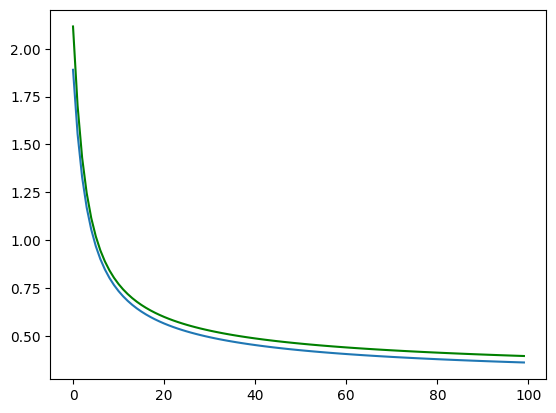

true :  9028
90.28


In [42]:
loss = 0
lossval = []
losstrain = []
for epoch in range(epochs) :
    for i in range(0,x_train.shape[0],batchsize) :
        x_batch = x_train[i:i+batchsize,:]
        y_batch = y_train[i:i+batchsize,:]
        
        predict = model.forward(x_batch)
        loss += LossFunction.forward(predict,y_batch)
        
        dY = LossFunction.backward()
        dW1,db1 = model.backward(dY)
        optim.step(dW1,db1)
    losstrain.append(loss/int(x_train.shape[0]/batchsize))
    loss = 0
    x = x_validation[:batchsize,:]
    y = y_validation[:batchsize,:]

    predict = model.forward(x)
    lossval.append(LossFunction.forward(predict,y))

    if(epoch%10 == 0) : 
        print(f"{epoch}======================================")
        print("Accuracy : ",Accuracy(predict,y))
        print("loss : ", lossval[len(lossval)-1] )
drowgraph(losstrain,lossval)

test_predict = model.forward(test_feature)
print(Accuracy(test_predict,test_target))

##### 1-layer (momentum + 1e-3)

In [43]:
lr  = 1e-3
mu = 0.9

model = Model_2(inputsize=x_train.shape[1],outputsize=y_train.shape[1])
LossFunction = ly.SoftMaxWithCrossEntropy()
optim = momentum(model,lr=lr,mu=mu)

0======================================
true :  449
Accuracy :  89.8
loss :  0.3623477713562908
10======================================
true :  464
Accuracy :  92.80000000000001
loss :  0.26481991512710634
20======================================
true :  465
Accuracy :  93.0
loss :  0.2551773922866917
30======================================
true :  462
Accuracy :  92.4
loss :  0.2516517032329904
40======================================
true :  464
Accuracy :  92.80000000000001
loss :  0.25007204234302843
50======================================
true :  464
Accuracy :  92.80000000000001
loss :  0.2493592311286049
60======================================
true :  465
Accuracy :  93.0
loss :  0.24910439043265994
70======================================
true :  465
Accuracy :  93.0
loss :  0.24911525354897587
80======================================
true :  466
Accuracy :  93.2
loss :  0.24928834835425334
90======================================
true :  466
Accuracy :  93.2
loss :  0.2495

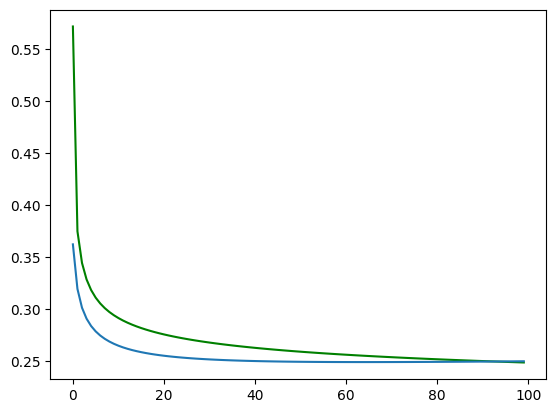

true :  9254
92.54


In [44]:
loss = 0
lossval = []
losstrain = []
for epoch in range(epochs) :
    for i in range(0,x_train.shape[0],batchsize) :
        x_batch = x_train[i:i+batchsize,:]
        y_batch = y_train[i:i+batchsize,:]
        
        predict = model.forward(x_batch)
        loss += LossFunction.forward(predict,y_batch)
        
        dY = LossFunction.backward()
        dW1,db1 = model.backward(dY)
        optim.step(dW1,db1)
    losstrain.append(loss/int(x_train.shape[0]/batchsize))
    loss = 0
    x = x_validation[:batchsize,:]
    y = y_validation[:batchsize,:]

    predict = model.forward(x)
    lossval.append(LossFunction.forward(predict,y))

    if(epoch%10 == 0) : 
        print(f"{epoch}======================================")
        print("Accuracy : ",Accuracy(predict,y))
        print("loss : ", lossval[len(lossval)-1] )
drowgraph(losstrain,lossval)

test_predict = model.forward(test_feature)
print(Accuracy(test_predict,test_target))